In [3]:
# colab 사용 불가능!!!
# ★★★★★★★★★★★★★

import cv2
import numpy as np

# 동영상 파일 경로
#video_path = 'C:/Users/user1/Documents/final_project/이상행동 CCTV 영상_test/cut_40-4_cam01_fight01_place01_night_spring.mp4'
video_path = 'C:/Users/user1/Documents/final_project/이상행동 CCTV 영상_test/cut_182-1_cam02_robbery01_place03_night_spring.mp4'

# 예측값 파일 경로
#pred_text_path = 'C:/Users/user1/Documents/final_project/test_video_pred_npy_folder/pred_ucf_cut_40-4_cam01_fight01_place01_night_spring.npy'
pred_text_path = 'C:/Users/user1/Documents/final_project/test_video_pred_npy_folder/pred_cut_182-1_cam02_robbery01_place03_night_spring.npy'
pred_text = np.load(pred_text_path)
pred_text = list(pred_text)
pred_text_ = pred_text
#pred_text_ = [1 - each for each in pred_text]
print(pred_text_)

#warning_value = np.percentile(pred_text, 80)

[0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.014780265, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.06359282, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.12424455, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.16309625, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.2977263, 0.769092, 0.769092, 0.769092, 0.769092,

In [5]:
# 동영상 파일 열기
cap = cv2.VideoCapture(video_path)

# 동영상의 프레임 속도 확인
fps = int(cap.get(cv2.CAP_PROP_FPS))

# 글자를 표시할 프레임 간격 설정
frame_interval = fps // 16  # 16fps마다 글자 표시

# 글자를 표시할 프레임 카운터 초기화
frame_count = 0

# 일정한 크기 (가로, 세로)
frame_width = 640
frame_height = 480

# 저장할 동영상 파일 경로와 설정
output_path = 'C:/Users/user1/Documents/final_project/rtfm_ucf_cctv_test_output_video_fight_182-1_cam02.mp4'
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 30.0  # 프레임 속도 (초당 프레임 수)


# VideoWriter 객체 생성
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))



while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # 동영상 프레임 크기 변경 (일정한 크기로)
    resized_frame = cv2.resize(frame, (frame_width, frame_height))
    
    # 글자를 표시할 프레임일 때
    if frame_count % frame_interval == 0:
        # 글자를 이미지에 추가
        display_pred_text = round(pred_text[frame_count],3)
        #print(display_pred_text)
        if display_pred_text > 0.8:
            text = f'Frame {frame_count}, Pred : {display_pred_text : .2f}, warning!'
            cv2.putText(resized_frame, text, (10, 40), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 0, 255), 2)
        else:
            text = f'Frame {frame_count}, Pred : {display_pred_text : .2f}'
            cv2.putText(resized_frame, text, (10, 40), cv2.FONT_HERSHEY_PLAIN, 1.5, (51, 153, 51), 2)

    frame_count += 1

    # 동영상 프레임 표시
    cv2.imshow('Video with Text', resized_frame)
    
    # 프레임을 저장
    out.write(resized_frame)

    # 'q' 키를 누르면 종료
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


# VideoCapture 및 VideoWriter 객체 해제
cap.release()
out.release()

# 모든 창 닫기
cv2.destroyAllWindows()

# 조금 예측값이 늦게 나오는 느낌..?
# 끝까지 재생하면 멈춤;;


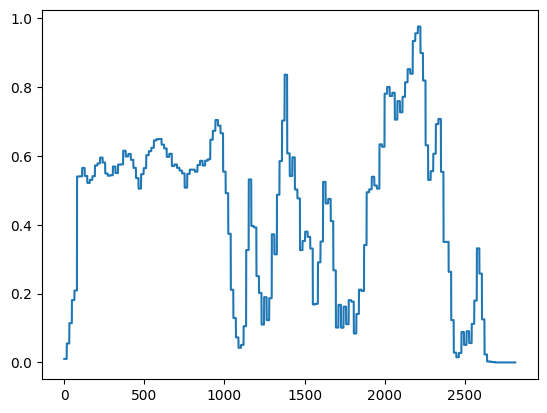

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

rand_x = np.arange(len(pred_text_))
plt.plot(rand_x, pred_text_)
plt.show()